In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
df = pd.read_csv('Classified_Data',sep=',',index_col= 0)
df.sample(9)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
601,1.099382,1.533805,1.028192,0.450726,0.672100,0.978098,0.896976,1.442516,1.240282,1.174676,0
297,0.828678,1.529803,1.017778,0.845642,1.176363,0.887919,1.182898,1.472502,0.923590,1.599667,0
419,0.924591,0.806335,1.105219,0.239709,1.185549,0.823994,0.943716,1.208891,1.318667,1.392346,0
155,0.562932,0.994353,0.770925,0.803646,0.994607,1.033093,1.341660,1.519735,1.235743,1.523789,0
62,1.046707,0.714688,0.767453,0.814669,0.766554,1.000398,1.456723,1.505883,1.309864,1.461480,0
26,0.855927,0.859602,0.834234,0.905675,1.187995,1.398766,0.907756,0.866683,1.720440,1.428350,1
109,0.371899,1.105633,1.114064,0.775687,1.252127,0.973179,1.511954,0.989890,1.367257,1.263894,0
433,0.946160,0.798313,1.028786,0.866488,1.502725,1.066345,1.197103,1.712430,0.949048,1.362814,0
172,0.594568,1.325248,0.870551,0.794391,1.437815,1.074281,1.110089,1.239892,0.962825,1.634474,0


Standardize the Variables


In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis =1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [89]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis =1))
print(scaled_features)

[[-0.12354188  0.18590747 -0.91343069 ... -1.48236813 -0.9497194
  -0.64331425]
 [-1.08483602 -0.43034845 -1.02531333 ... -0.20224031 -1.82805088
   0.63675862]
 [-0.78870217  0.33931821  0.30151137 ...  0.28570652 -0.68249379
  -0.37784986]
 ...
 [ 0.64177714 -0.51308341 -0.17920486 ... -2.36249443 -0.81426092
   0.11159651]
 [ 0.46707241 -0.98278576 -1.46519359 ... -0.03677699  0.40602453
  -0.85567   ]
 [-0.38765353 -0.59589427 -1.4313981  ... -0.56778932  0.3369971
   0.01034996]]


In [90]:
df_features = pd.DataFrame(scaled_features,columns= df.columns[:-1])
print(df_features.head())

        WTT       PTI       EQW  ...       PJF       HQE       NXJ
0 -0.123542  0.185907 -0.913431  ... -1.482368 -0.949719 -0.643314
1 -1.084836 -0.430348 -1.025313  ... -0.202240 -1.828051  0.636759
2 -0.788702  0.339318  0.301511  ...  0.285707 -0.682494 -0.377850
3  0.982841  1.060193 -0.621399  ...  1.066491  1.241325 -1.026987
4  1.139275 -0.640392 -0.709819  ... -1.472352  1.040772  0.276510

[5 rows x 10 columns]



Train Test Split

In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_features,df['TARGET CLASS'],test_size = 0.30)

Importing KNN

In [92]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [93]:
pred = knn.predict(x_test)


Predictions and Evaluations

In [94]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[130  20]
 [  7 143]]
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       150
           1       0.88      0.95      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



Choosing a K Value  So here We're changing k Value and monitoring Error Rate

In [95]:
error_rate = []
for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  pred_i = knn.predict(x_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

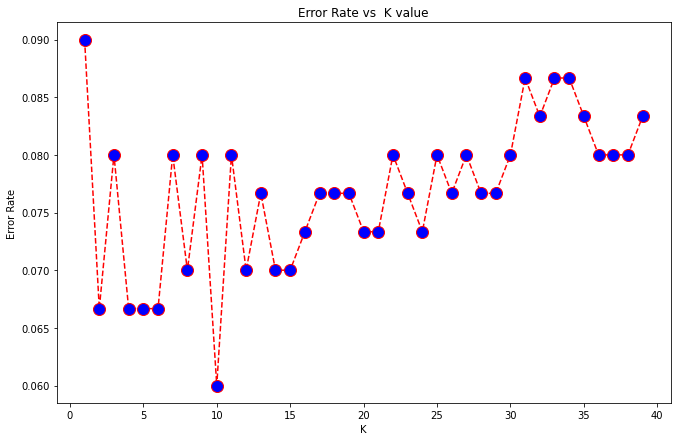

In [96]:
plt.figure(figsize=(11,7))
plt.plot(range(1,40),error_rate,color = 'red',linestyle = 'dashed',marker = 'o',
         markerfacecolor = 'blue',markersize = 12)
plt.title('Error Rate vs  K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

With the Best K vale

In [97]:
knn = KNeighborsClassifier(n_neighbors= 11)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[129  21]
 [  3 147]]


              precision    recall  f1-score   support

           0       0.98      0.86      0.91       150
           1       0.88      0.98      0.92       150

    accuracy                           0.92       300
   macro avg       0.93      0.92      0.92       300
weighted avg       0.93      0.92      0.92       300

